In [14]:
import numpy as np
import sklearn as sk
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import random
%matplotlib inline
from sklearn import datasets



In [4]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,55797.0,-1.107345,0.367336,2.480637,2.890058,0.625870,1.302663,-0.388341,0.404049,-0.926287,...,-0.118306,-0.192741,-0.283377,-0.669556,0.175871,0.226846,-0.006618,0.156385,37.27,0
1,37258.0,-1.442560,1.398568,1.062191,-0.113986,0.098310,0.295054,0.237661,-2.295535,-0.576234,...,2.464967,-0.147299,0.124204,0.190213,-0.045854,-0.507289,0.335387,0.102170,71.99,0
2,148677.0,2.057013,-0.315957,-2.789351,-0.775407,2.497459,3.164336,-0.396948,0.715272,0.448163,...,0.243465,0.744133,0.038125,0.737510,0.303059,-0.087826,-0.001087,-0.065006,3.50,0
3,87150.0,-0.007374,0.692235,0.317161,-0.662044,0.264434,-0.894766,0.795858,0.031208,-0.050025,...,-0.222228,-0.582693,0.090414,0.023392,-0.589852,0.120801,0.232080,0.084524,3.57,0
4,81853.0,1.256653,0.138079,0.069747,0.094839,-0.352195,-1.308192,0.353293,-0.326797,-0.081518,...,-0.429359,-1.338348,0.188336,0.409202,0.094498,0.619344,-0.104868,0.007905,30.00,0


In [5]:
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_fraud))

492
284315


In [6]:
#Exploratory data analysis
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

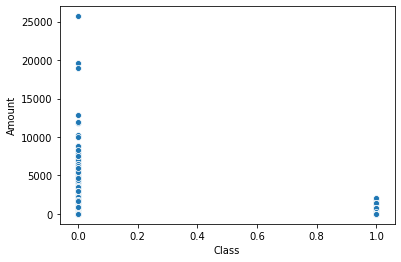

In [13]:
#visualize
sns.scatterplot(x='Class', y='Amount', data=df)

# **Fraud detection


*   Explore the data set/ visualize 
*  Decide which features are important
*   Perform machine learning
*  Test the model on the testing set.







In [19]:
#Time to write the model

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [20]:
x = df.iloc [:, :-1]
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)



In [21]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, Y_train)
print('Score:', logistic.score, (X_test, Y_test))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: <bound method ClassifierMixin.score of LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)> (            Time        V1        V2        V3        V4        V5        V6  \
218239   99472.0 -0.551488  1.391582  0.863777  1.278519 -0.549607  1.421379   
130881   39860.0  1.326913 -0.601837  0.159064 -0.471879 -0.929957 -0.832374   
141415  133614.0  1.869913 -0.573923 -0.413813  1.268083 -0.659919  0.135353   
100372   21068.0  1.162263 -0.368350  1.132327 -0.478254 -1.189775 -0.509490   
48711    65889.0 -0.470041  0.984112  1.666275 -0.097331 -0.137320 -0.695411   
...          ...       ...       ...       ...       ...       ...       ...   
158469   54563.0 -0.887092  0.706838  1.732832 -1.310538  0.02

In [23]:
Y_prediction = np.array(logistic.predict(X_test))
print(Y_prediction)

[0 0 0 ... 0 0 0]


In [24]:
from sklearn.metrics import accuracy_score
y_predict = logistic.predict(X_test)
accuracy_score(y_predict, Y_test)

0.9988904806044774

In [0]:
#Model is overfit need more work